In [1]:
import healpy as hp
import numpy as np
import pylab as plt
from coord_utils import compute_w, polar_to_cartesian, phase_vector, generate_phase_vector, skycoord_to_ephem, sky2pix, pix2sky
from ant_array2 import RadioArray
from allsky_viewer import AllSkyViewer, generate_skycat
from astropy.time import Time
import ephem
import numpy as np
import pylab as plt
import h5py
from astropy.coordinates import SkyCoord, Angle

In [2]:
filename_data = 'test-data/eda2/20200209/chan_204_20200209T034646_vis_real.fits'
filename_ant  = 'eda_antenna_locations_v2.h5'
# Setup array
f_mhz = np.array([159.3750])
lat = '-26:42:11:95'
lon = '116:40:14.93'
elev = 500
t = Time('2020-02-09T03:46:46.0', format='isot')
sun = ephem.Sun()

# Initialize EDA array
eda = RadioArray(lat, lon, elev, f_mhz, filename_ant, t0=t.datetime, verbose=True, phase_center=sun)
eda.load_fits_data(filename_data)

xyzc = eda.xyz_celestial

Time: 2020/2/9 03:46:46
Sun 	RA / DEC:  (21:29:01.23, -14:51:39.7) 
	ALT / AZ:  (74:49:40.3, 40:43:47.7)
ZENITH: (20:47:08.87, -26:46:33.5)
HA, D: (-0.18270382264997043, -14:51:39.7)


/var/folders/n3/pbwrsp713bd28_l4xt61c7zh0000gn/T/ipykernel_83786/587730907.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(eda.data)))


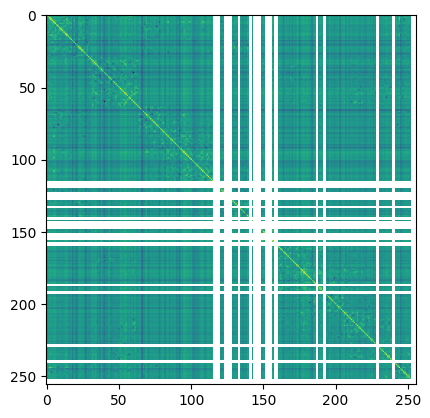

In [3]:
plt.imshow(np.log(np.abs(eda.data)))

/Users/dancpr/Data/eda_post_x/ant_array2.py:166: RuntimeWarning: invalid value encountered in sqrt
  ng     = np.sqrt(1 - lg**2 - mg**2)


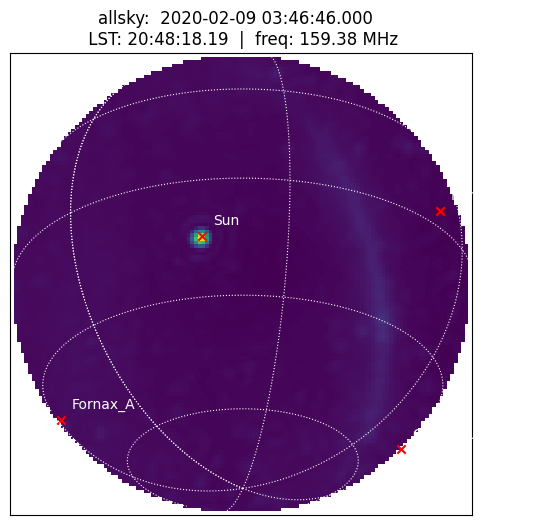

In [4]:
img = eda.make_image()

asv = AllSkyViewer(observer=eda, ts=t, f_mhz=f_mhz[0], n_pix=128)
skycat = generate_skycat(asv.observer)
asv.load_skycat(skycat)

asv.new_fig(6)
asv.plot(img, overlay_srcs=True)

In [14]:
%timeit hmap = eda.make_healpix(n_side=16, fov=np.pi/2*0.75, update=False)

11 ms ± 225 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
%timeit img = eda.make_image(n_pix=64, update_weight_grid=False)

32.5 ms ± 876 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [20]:
%matplotlib inline

/var/folders/n3/pbwrsp713bd28_l4xt61c7zh0000gn/T/ipykernel_83786/1433059962.py:2: RuntimeWarning: divide by zero encountered in log
  hp.mollview(np.log(hmap))


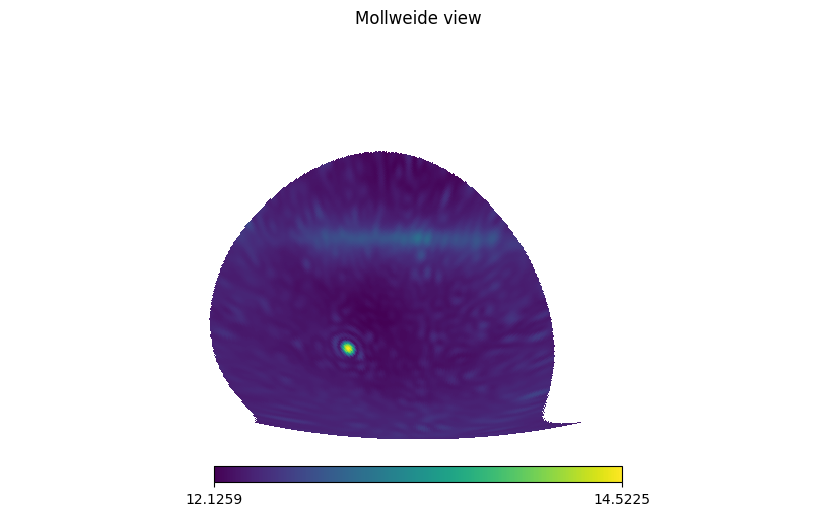

In [21]:
hmap = eda.make_healpix(n_side=128, fov=np.pi/2*0.75)
hp.mollview(np.log(hmap))